In [1]:
import os, sys
sys.path.append(os.getcwd())
import radix

In [2]:
import matplotlib.pyplot as plt
from timeit import default_timer

plt.style.use("ggplot")

def timer(callable):
    start = default_timer()
    callable()
    return default_timer() - start

In [3]:
import random
datasets = []
for _ in range(100):
    dataset = []
    for _ in range(random.randint(100, 10_000)):  # how many elements
        dataset.append(random.randint(0, 100_000))  # value of those elements
    datasets.append(dataset)

In [4]:
results_radix = []
for dataset in datasets:
    n = len(dataset)
    elapsed_time = timer(lambda: radix.radix_sort(dataset))
    results_radix.append((n, elapsed_time))

In [5]:
results_stdlib = []
for dataset in datasets:
    n = len(dataset)
    elapsed_time = timer(lambda: sorted(dataset))
    results_stdlib.append((n, elapsed_time))

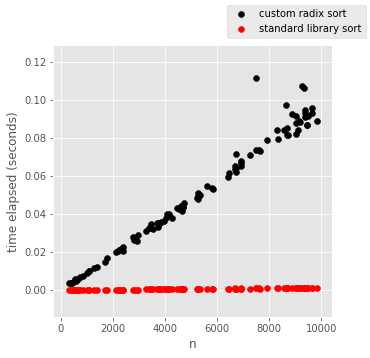

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(*zip(*results_radix), c="black", label="custom radix sort")
ax.scatter(*zip(*results_stdlib), c="red", label="standard library sort")
ax.set(xlabel="n", ylabel="time elapsed (seconds)")
fig.legend()

In [7]:
fig.savefig("result.png")